# Designing the Coin Flipping Simulation:

In [1]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
class coin_flip_simulation:
    '''1 is Head & 0 is Tail'''

    def __init__(self):
        pass

    def parse_binary(self, val):
        '''converts a binary value (1 or 0) into a string representation ('Head' or 'Tail')'''
        if val == 1:
            return 'Head'
        elif val == 0:
            return 'Tail'
        else:
            print('Invalid input value! Input either 1 or 0! 1 is Head & 0 is Tail')

    def flip_coin_one_time(self):
        '''Simulating flipping a fair coin once and returns the result as an integer (1 for 'Head' and 0 for 'Tail')'''
        return random.randint(0, 1)
    
    def flip_coin_multiple_times(self, number_of_flips, return_probabilities=False):
        '''
        Simulates flipping a fair coin multiple times and returns various statistics related to the flips.

        Input:
            number_of_flips (int or list of ints): The number of times to flip the coin. If it's a list, the method will perform simulations for each value in the list.
            return_probabilities (bool): If True, returns probabilities of getting heads and tails in the simulations; if False, returns counts. Default is False.

        Output:
            If number_of_flips is an int:
                If return_probabilities is False, returns a tuple (heads_count, tails_count, number_of_flips, flips_sequence).
                If return_probabilities is True, returns a tuple (probability_of_head, probability_of_tail, number_of_flips, flips_sequence).
            If number_of_flips is an list:
                If return_probabilities is False, returns a tuple (heads_list_count, tails_list_count, number_of_flips, flips_sequence).
                If return_probabilities is True, returns a tuple (heads_list_probabilities, tails_list_probabilities, number_of_flips, flips_sequence).
        '''

        if type(number_of_flips) == int:
            flips_sequence = []
            heads_count, tails_count = 0, 0
            for _ in range(number_of_flips):
                flip = self.flip_coin_one_time()
                if flip == 1:
                    heads_count += 1
                else:
                    tails_count += 1
                flips_sequence.append(flip)

            if return_probabilities == False:
                return heads_count, tails_count, number_of_flips, flips_sequence
            elif return_probabilities == True:
                return heads_count/number_of_flips, tails_count/number_of_flips, number_of_flips, flips_sequence
            else:
                print(f'Please provide a valid boolen value: True/False for "return_probabilities" argument!')

        elif type(number_of_flips) == list:
            flips_data = []
            flips_sequence = []

            for flips in number_of_flips:
                heads, tails, n_flip, flip_sequence = self.flip_coin_multiple_times(flips, return_probabilities)
                flips_data.append([heads, tails])
                flip_sequence = [self.parse_binary(x) for x in flip_sequence]
                flips_sequence.append(flip_sequence)
                
            flips_data = np.array(flips_data).transpose()

            heads_list = flips_data[0]
            tails_list = flips_data[1]

            return list(heads_list), list(tails_list), number_of_flips, flips_sequence

        else:
            print('Input should be either int or list of int values!')

    def calculate_sequence_probabilities(self, number_of_flips, sequence_to_check):
        '''
        Calculates the probability of a specific sequence occurring in a series of coin flips.

        Inputs:
            number_of_flips (int or list of ints): The number of times to flip the coin. If it's a list, the method will perform calculations for each value in the list.
            sequence_to_check (list of str): The sequence to check for, represented as a list of strings ('Head' or 'Tail').

        Outputs:
            If number_of_flips is an int:
                Returns the probability of the specified sequence occurring in the coin flips, along with the total number of flips and the sequence being checked.
            If number_of_flips is a list of ints:
                Returns a list of probabilities for each simulation in the list, along with the list of total flip counts and the sequence being checked.
        '''
        length = len(sequence_to_check)
        binary_sequence = [1 if x == 'Head' else 0 for x in sequence_to_check]

        if type(number_of_flips) == int:
            sequence_match, sequence_not_match = 0, 0

            for _ in range(number_of_flips):
                result = [self.flip_coin_one_time() for _ in range(length)]
                if result == binary_sequence:
                    sequence_match += 1
                else:
                    sequence_not_match += 1

            probability = sequence_match / number_of_flips

            return probability, number_of_flips, sequence_to_check
        
        elif type(number_of_flips) == list:
            data = []
            for flips in number_of_flips:
                p, _, _ = self.calculate_sequence_probabilities(flips, sequence_to_check)
                data.append(p)
            return data, number_of_flips, sequence_to_check

        else:
            print('Input should be either int or list of int values!')
            

# EXAMPLE USAGE

# coin = coin_flip_simulation()
# coin.flip_coin_multiple_times(100, True)
# coin.flip_coin_multiple_times([10, 20], True)
# coin.calculate_sequence_probabilities(200, ['Head','Tail', 'Head'])
# coin.calculate_sequence_probabilities([10, 20], ['Head','Tail', 'Head'])

# Performing the Simulation:

## Non-Sequential Coin Toss

In [3]:
coin = coin_flip_simulation()

In [4]:
# Conducting the coin flipping simulation, recording the outcomes of each flip (heads or tails)

heads_list, tails_list, total_flips_list, _ = coin.flip_coin_multiple_times(number_of_flips=number_of_coin_flips, return_probabilities=False)

for heads, tails, total_flips in zip(heads_list, tails_list, total_flips_list):
    print(f"For {total_flips} flips, got {heads} heads and {tails} tails")

For 10 flips, got 4 heads and 6 tails
For 50 flips, got 32 heads and 18 tails
For 100 flips, got 44 heads and 56 tails
For 500 flips, got 231 heads and 269 tails
For 1000 flips, got 529 heads and 471 tails
For 10000 flips, got 4996 heads and 5004 tails
For 100000 flips, got 50273 heads and 49727 tails
For 1000000 flips, got 499583 heads and 500417 tails


In [54]:
heads_probability, tails_probability, total_filps_performed, _ = coin.flip_coin_multiple_times(1000, return_probabilities=True)

print(f"Probability statistics for {total_filps_performed} coin flips")
print(f"Probability of getting heads (P(Heads)): {heads_probability}")
print(f"Probability of getting tails (P(Tails)). {tails_probability}")

Probability statistics for 1000 coin flips
Probability of getting heads (P(Heads)): 0.475
Probability of getting tails (P(Tails)). 0.525


In [55]:
HTH_sequence_probability, total_filps_performed, sequence = coin.calculate_sequence_probabilities(
    number_of_flips=1000, 
    sequence_to_check=['Head', 'Tail', 'Head']
)

print(f'Probability of {sequence} sequence for {total_filps_performed} flips: {HTH_sequence_probability}')

Probability of ['Head', 'Tail', 'Head'] sequence for 1000 flips: 0.144


### Sequential Coin Toss

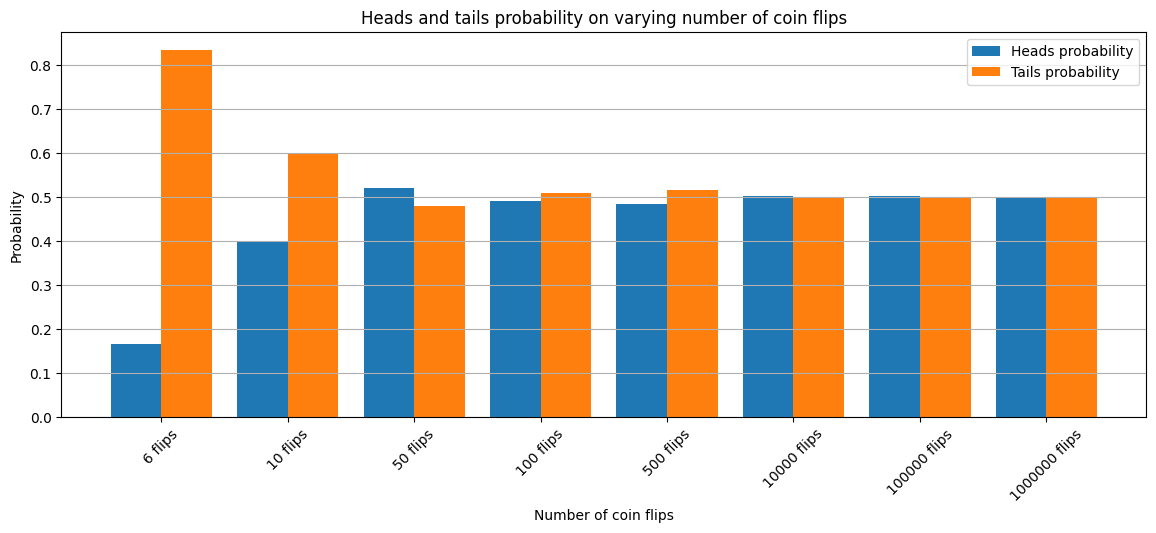

In [14]:
n_flips = [6, 10, 50, 100, 500, 10_000, 100_000, 1_000_000]

heads_probability, tails_probability, _, _ = coin.flip_coin_multiple_times(n_flips, return_probabilities=True)
  
X_axis = np.arange(len(n_flips))
  
plt.figure(figsize=(14,5))
plt.bar(X_axis - 0.2, heads_probability, 0.4, label = 'Heads probability')
plt.bar(X_axis + 0.2, tails_probability, 0.4, label = 'Tails probability')

X_label = [f'{x} flips' for x in n_flips]
plt.xticks(X_axis, X_label, rotation=45)
plt.xlabel('Number of coin flips')
plt.ylabel('Probability')
plt.title("Heads and tails probability on varying number of coin flips")
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.show()

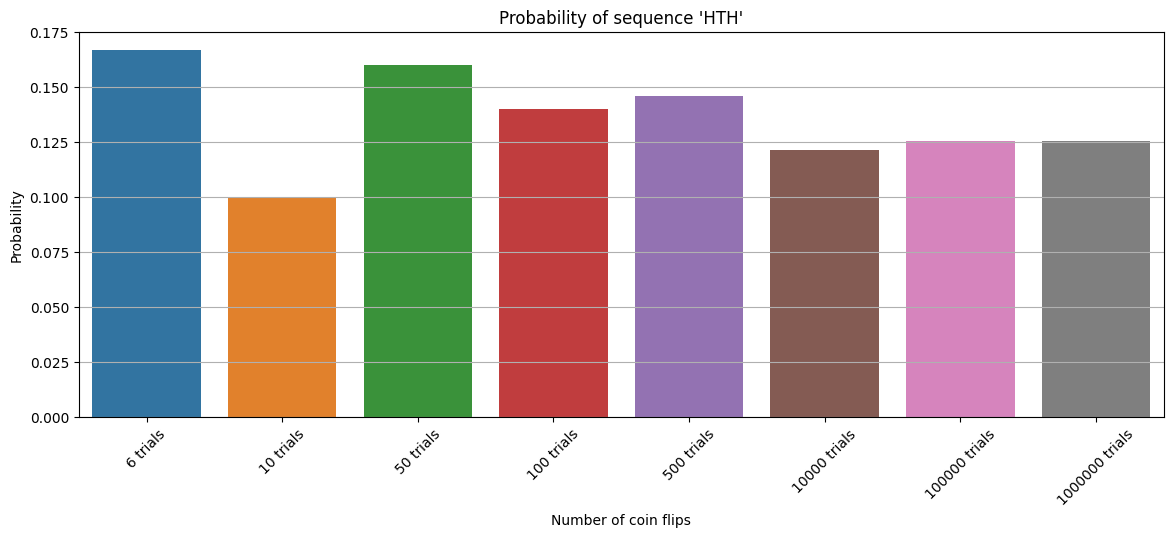

In [17]:
n_flips = [6, 10, 50, 100, 500, 10_000, 100_000, 1_000_000]

probabilities, flips, sequence = coin.calculate_sequence_probabilities(number_of_flips=n_flips, sequence_to_check=['Head', 'Tail', 'Head'])

X_axis = np.arange(len(n_flips))

plt.figure(figsize=(14,5))
sns.barplot(x=flips, y=probabilities)
X_label = [f'{x} trials' for x in n_flips]
plt.xticks(X_axis, X_label, rotation=45)
plt.yticks([i * 0.025 for i in range(8)])
plt.xlabel('Number of coin flips')
plt.ylabel('Probability')
plt.title(f"Probability of sequence 'HTH'")
plt.grid(axis='y')
plt.show()